In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as an
import sklearn.metrics
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#adata=sc.read(results_file_post)
#adata.uns['log1p'] = {"base":None}

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.3 anndata==0.10.7 umap==0.5.5 numpy==1.26.4 scipy==1.13.0 pandas==2.2.2 scikit-learn==1.4.2 statsmodels==0.14.1 python-igraph==0.10.4 pynndescent==0.5.12


In [4]:
#%matplotlib inline

In [5]:
writeDir = "write/"

fileName = "Chen_liver"

resultsFileQC = writeDir + fileName + '_QC.h5ad' 


In [6]:
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=150, fontsize=10, format='png')
sc.settings.figdir = "figures/" + fileName + "/"
figName = fileName

# Read In Data

In [7]:
inDir = f'data/regenData/liverRegen'

In [8]:
adata0 = sc.read_10x_mtx(inDir, prefix="GSM4812353_PHX_0_10X_", cache=True)
adata0

... reading from cache file cache/data-regenData-liverRegen-GSM4812353_PHX_0_10X_matrix.h5ad


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 59202 × 27998
    var: 'gene_ids', 'feature_types'

In [9]:
adata48 = sc.read_10x_mtx(inDir, prefix="GSM4812354_PHX_48_10X_",cache=True)
adata48

... reading from cache file cache/data-regenData-liverRegen-GSM4812354_PHX_48_10X_matrix.h5ad


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 1586 × 27998
    var: 'gene_ids', 'feature_types'

In [10]:
adata = an.concat([adata0, adata48], 
                  label="label", keys=["0","48"],
                 index_unique="_")
adata

AnnData object with n_obs × n_vars = 60788 × 27998
    obs: 'label'

In [11]:
adata.var_names_make_unique()
adata.obs_names_make_unique()

In [12]:
adata.obs 

label
AAACCTGAGAAACCGC-1_0      0
AAACCTGAGAATGTGT-1_0      0
AAACCTGAGACGCACA-1_0      0
AAACCTGAGAGAGCTC-1_0      0
AAACCTGAGAGGACGG-1_0      0
...                     ...
TTTGGTTGTCTTGATG-1_48    48
TTTGGTTGTTATGCGT-1_48    48
TTTGTCACACGGTGTC-1_48    48
TTTGTCAGTGCCTGCA-1_48    48
TTTGTCAGTTACTGAC-1_48    48

[60788 rows x 1 columns]

In [13]:
adata.var

Empty DataFrame
Columns: []
Index: [Xkr4, Gm1992, Gm37381, Rp1, Rp1-1, Sox17, Gm37323, Mrpl15, Lypla1, Gm37988, Tcea1, Rgs20, Gm16041, Atp6v1h, Oprk1, Npbwr1, Rb1cc1, 4732440D04Rik, Fam150a, St18, Pcmtd1, Gm26901, Gm30414, Sntg1, Rrs1, Adhfe1, 3110035E14Rik, Gm29520, Mybl1, Vcpip1, 1700034P13Rik, Sgk3, Mcmdc2, Snhg6, Tcf24, Ppp1r42, Gm15818, Cops5, Cspp1, Arfgef1, Cpa6, Prex2, A830018L16Rik, Gm17644, Gm29663, Sulf1, Slco5a1, Gm29283, Prdm14, Ncoa2, Gm29570, Tram1, Lactb2, Xkr9, Eya1, Gm9947, Msc, Trpa1, Kcnb2, Terf1, Sbspon, 4930444P10Rik, Rpl7, Rdh10, Gm28095, Stau2, Gm7568, Ube2w, Tceb1, D030040B21Rik, Tmem70, Ly96, Gm28376, Jph1, Gm28783, Gdap1, Gm28784, Pi15, Gm28154, Gm16070, Crispld1, Gm28153, Crisp4, Defb18, Defb41, Gm29006, Gm15825, Tfap2d, Tfap2b, Gm28340, Pkhd1, 4930486I03Rik, Gm28653, Il17a, Il17f, Mcm3, Gm28065, 6720483E21Rik, Paqr8, Efhc1, ...]

[27998 rows x 0 columns]

# QC

normalizing counts per cell
    finished (0:00:00)


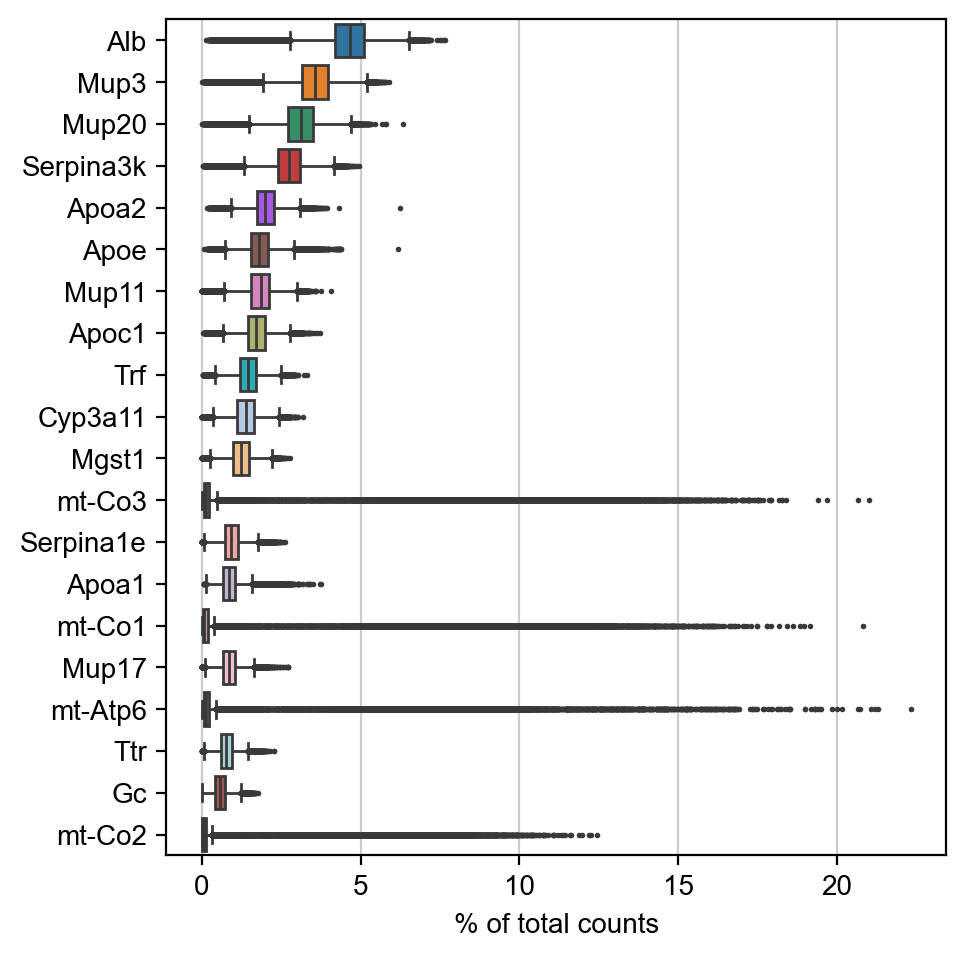

In [14]:
sc.pl.highest_expr_genes(adata, n_top=20, )

/tmp/ipykernel_2999615/3542297969.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


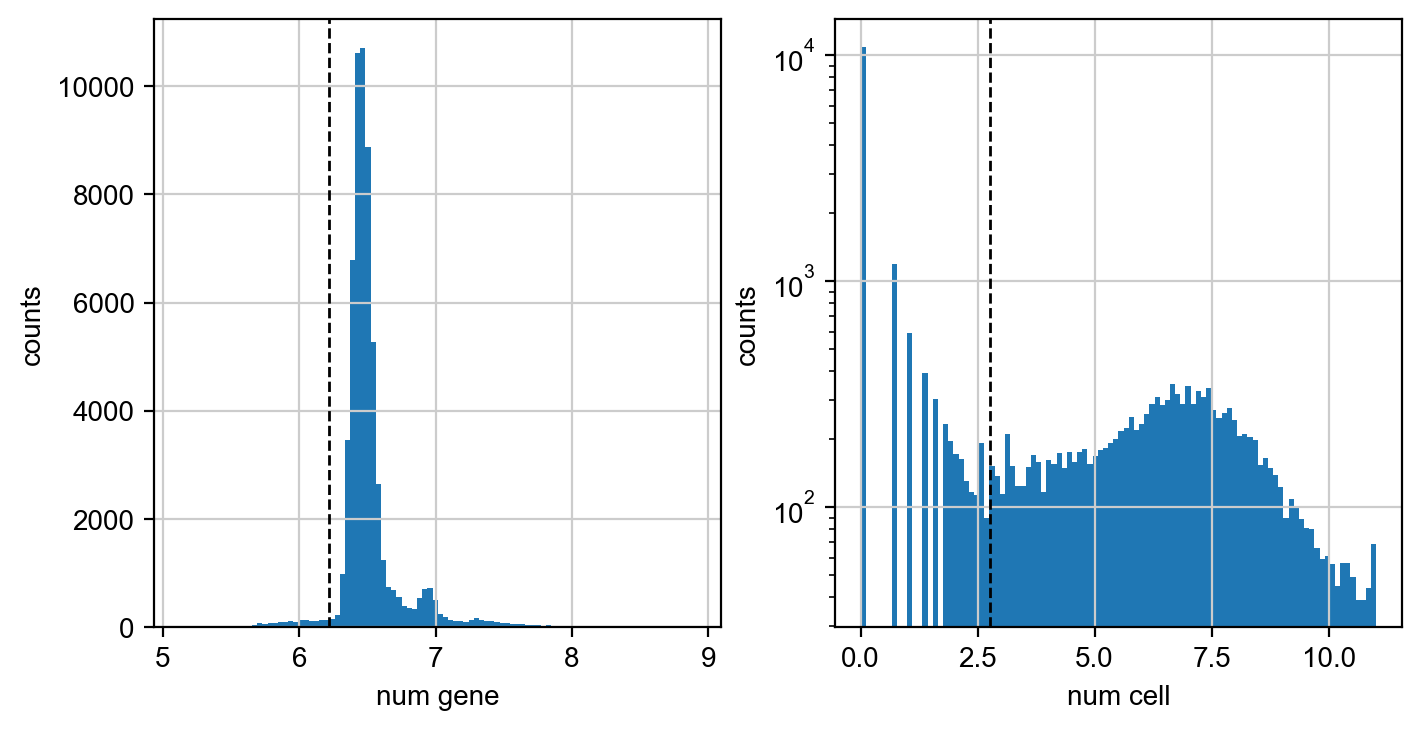

In [15]:
valX = adata.X>0
minGenes=500
minCells=15

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

numCellwExp = valX.sum(axis=1)
axs[0].hist(np.log(numCellwExp), bins=100)#, log=True)
axs[0].axvline(np.log(minGenes), color='k', linestyle='dashed', linewidth=1)
axs[0].set_xlabel('num gene')
axs[0].set_ylabel('counts')

numGeneswExp = valX.sum(axis=0).T
axs[1].hist(np.log(numGeneswExp+1), bins=100, log=True)
axs[1].axvline(np.log(minCells+1), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(600), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(4000), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].set_title('Gene means counts')
axs[1].set_xlabel('num cell')
axs[1].set_ylabel('counts')

fig.show()

In [16]:
#sc.pp.filter_cells(adata, min_genes = minGenes)
#sc.pp.filter_genes(adata, min_cells = minCells)

In [17]:
adata = adata[:,np.logical_not(adata.var_names=="Malat1")]

## Mito QC

In [18]:
for g in adata.var_names:
    if "MT-" == g[:2]:
        print(g)

In [19]:
adata.var['mt'] = adata.var_names.str.startswith('mt-') 
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], log1p = False, inplace=True)

/tmp/ipykernel_2999615/3426326396.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['mt'] = adata.var_names.str.startswith('mt-')


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


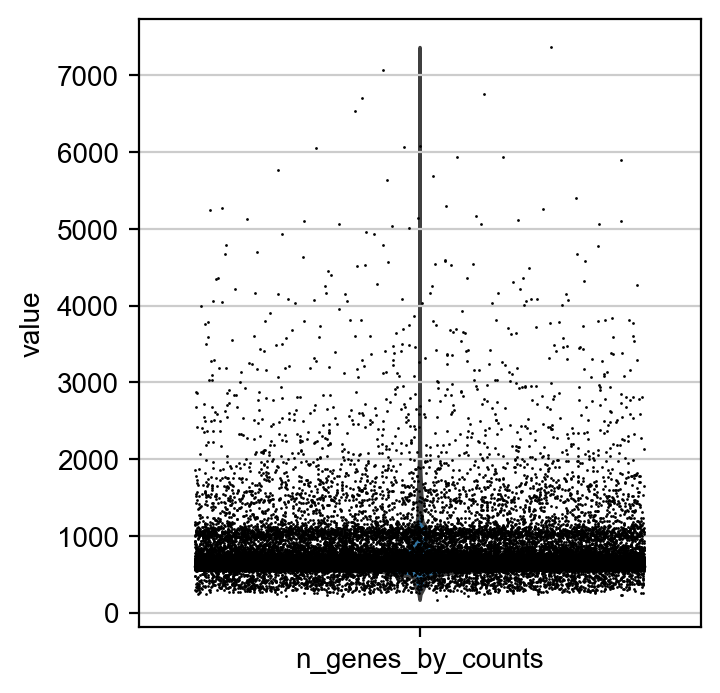

In [20]:
sc.pl.violin(adata, ['n_genes_by_counts'], jitter=0.4)

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


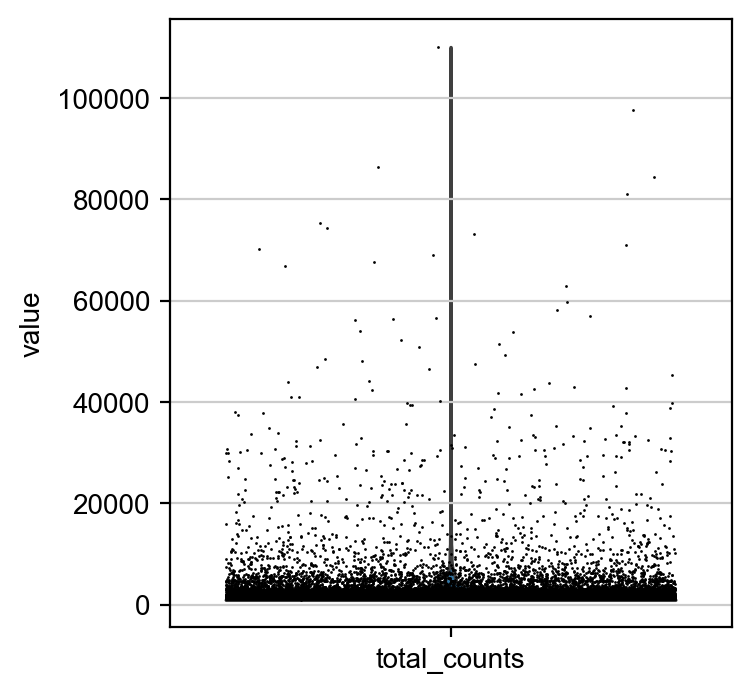

In [21]:
sc.pl.violin(adata, ['total_counts'], jitter=0.4)

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


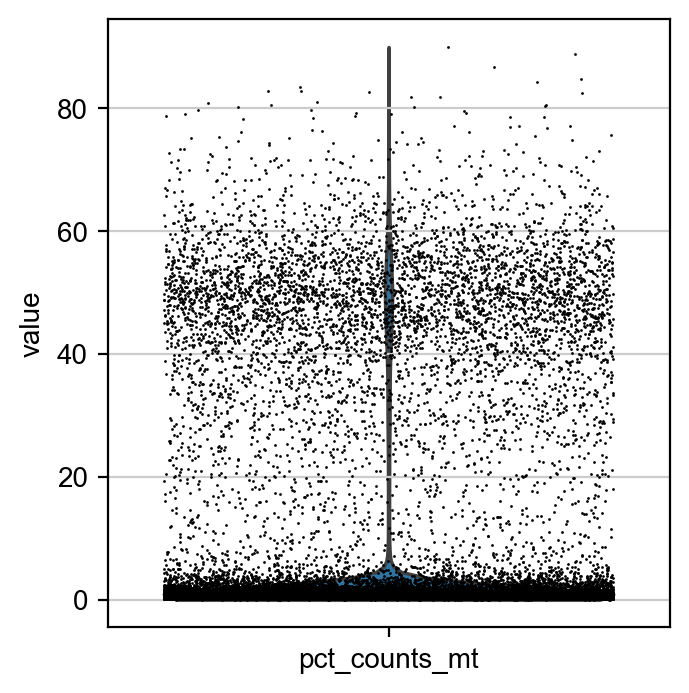

In [22]:
sc.pl.violin(adata, ['pct_counts_mt'], jitter=0.4)

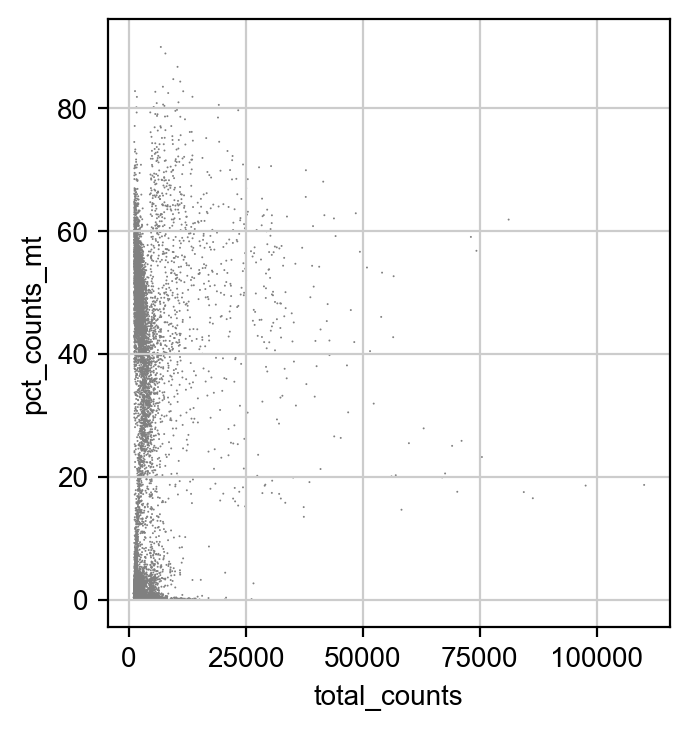

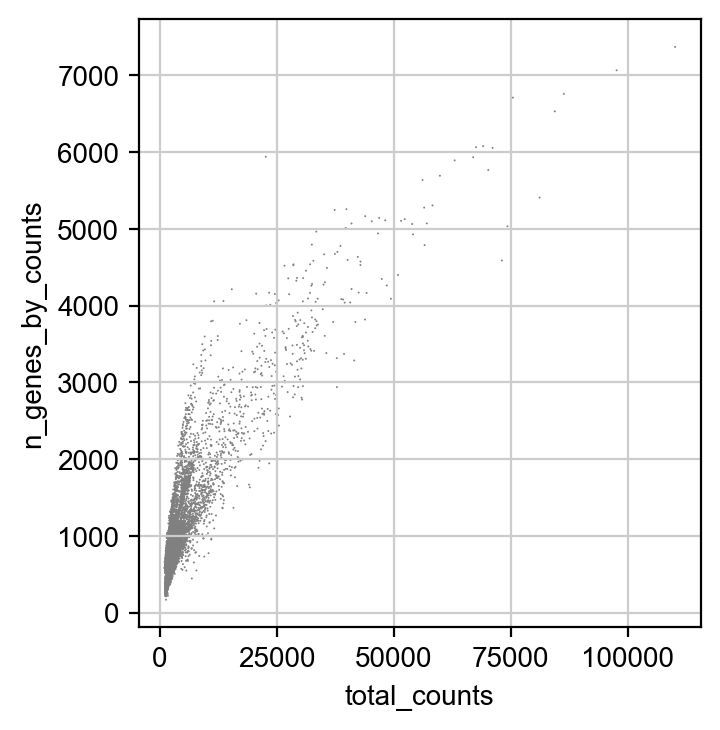

In [23]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

remove cells that have too much mito or could be doublets

In [31]:
adata = adata[adata.obs.n_genes_by_counts < 3000, :]
adata = adata[adata.obs.total_counts < 25000, :]
adata = adata[adata.obs.pct_counts_mt < 20, :]

save post QC scanpy

In [32]:
adata

View of AnnData object with n_obs × n_vars = 55595 × 13196
    obs: 'label', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [33]:
resultsFileQC

'write/Chen_liver_QC.h5ad'

In [34]:
adata.write(resultsFileQC)

# Analysis

In [35]:
resultsFile = writeDir + fileName + '.h5ad'       # final output
resultsFileQC = writeDir + fileName + '_QC.h5ad'  # post QC (pre-analysis) 

Set figure parameters

In [36]:
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=150, fontsize=10, format='png')
sc.settings.figdir = "figures/" + fileName + "/"
figName = fileName

In [37]:
adata = sc.read_h5ad(resultsFileQC)
adata

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 55595 × 13196
    obs: 'label', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [38]:
sc.pp.normalize_total(adata,target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [39]:
sc.pp.log1p(adata)

In [40]:
sc.pp.highly_variable_genes(adata)#, flavor = "seurat", n_top_genes=2000)

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


2289


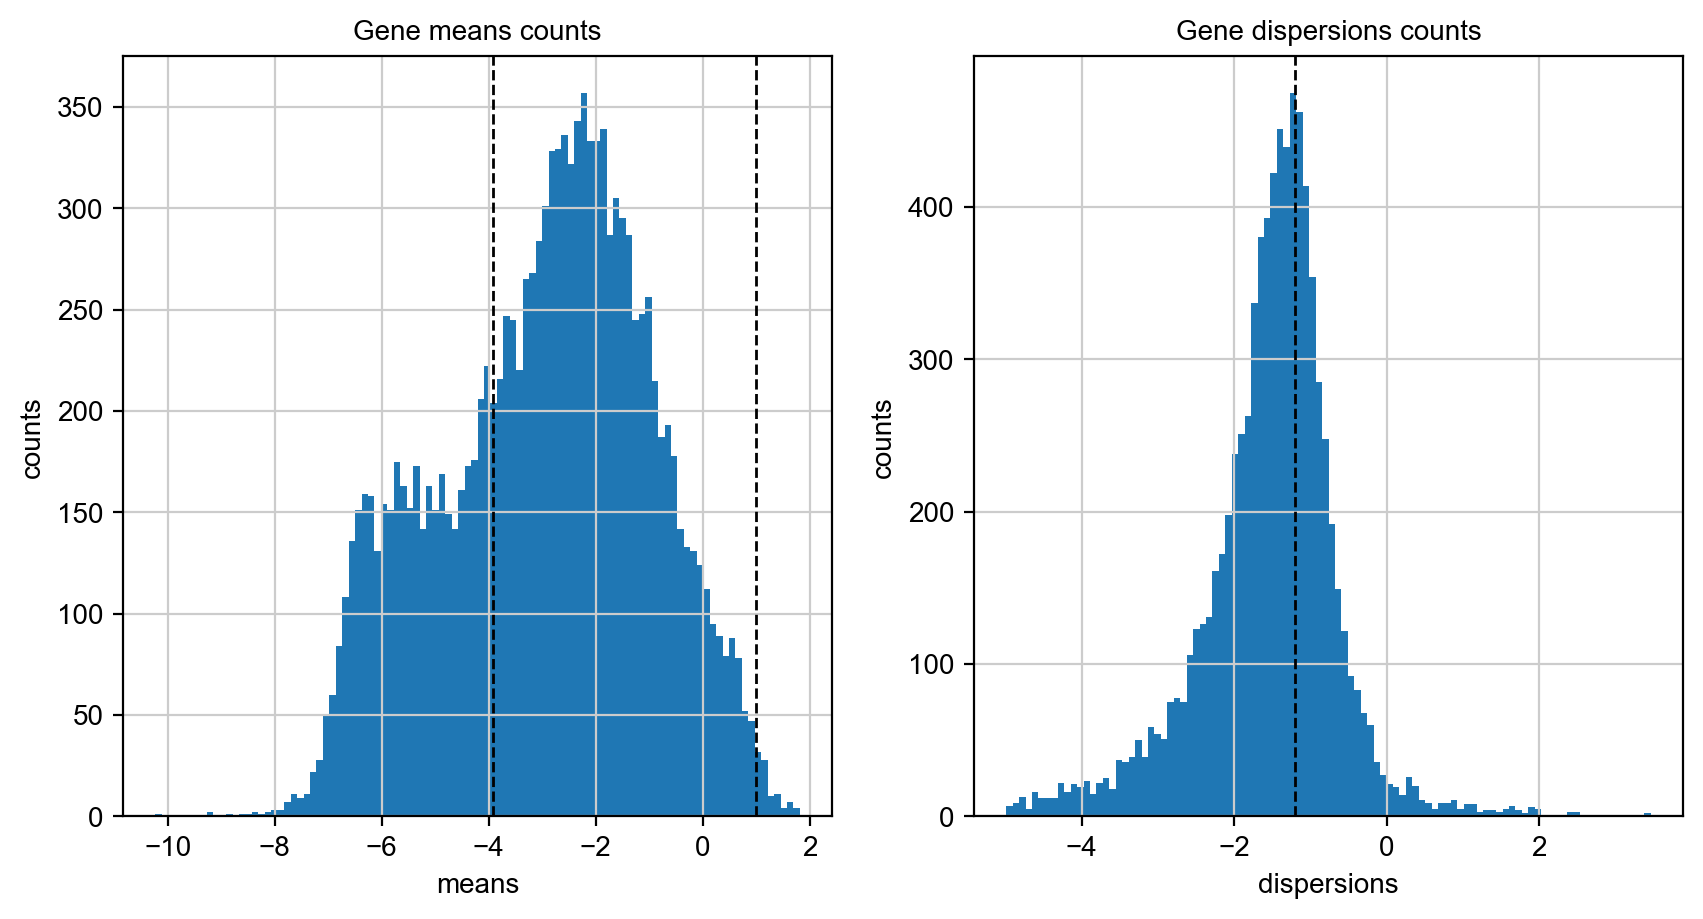

In [45]:
minMean = 0.02
maxMean = 2.7
minDisp = 0.3

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

means = adata.var[["means"]][adata.var[["means"]] > np.exp(-14)]#adata.var[["means"]],
axs[0].hist(np.log(means), bins=100)#, log=True),
axs[0].axvline(np.log(minMean), color='k', linestyle='dashed', linewidth=1)
axs[0].axvline(np.log(maxMean), color='k', linestyle='dashed', linewidth=1)
axs[0].set_title('Gene means counts')
axs[0].set_xlabel('means')
axs[0].set_ylabel('counts')

dispNorm = adata.var[["dispersions_norm"]][adata.var[["dispersions_norm"]] > np.exp(-5)]#adata.var[["means"]],
axs[1].hist(np.log(dispNorm), bins=100)#, log=True),
axs[1].axvline(np.log(minDisp), color='k', linestyle='dashed', linewidth=1)
axs[1].set_title('Gene dispersions counts')
axs[1].set_xlabel('dispersions')
axs[1].set_ylabel('counts')

sc.pp.highly_variable_genes(adata, min_disp=minDisp, min_mean=minMean, max_mean=maxMean)
print(sum(adata.var.highly_variable))

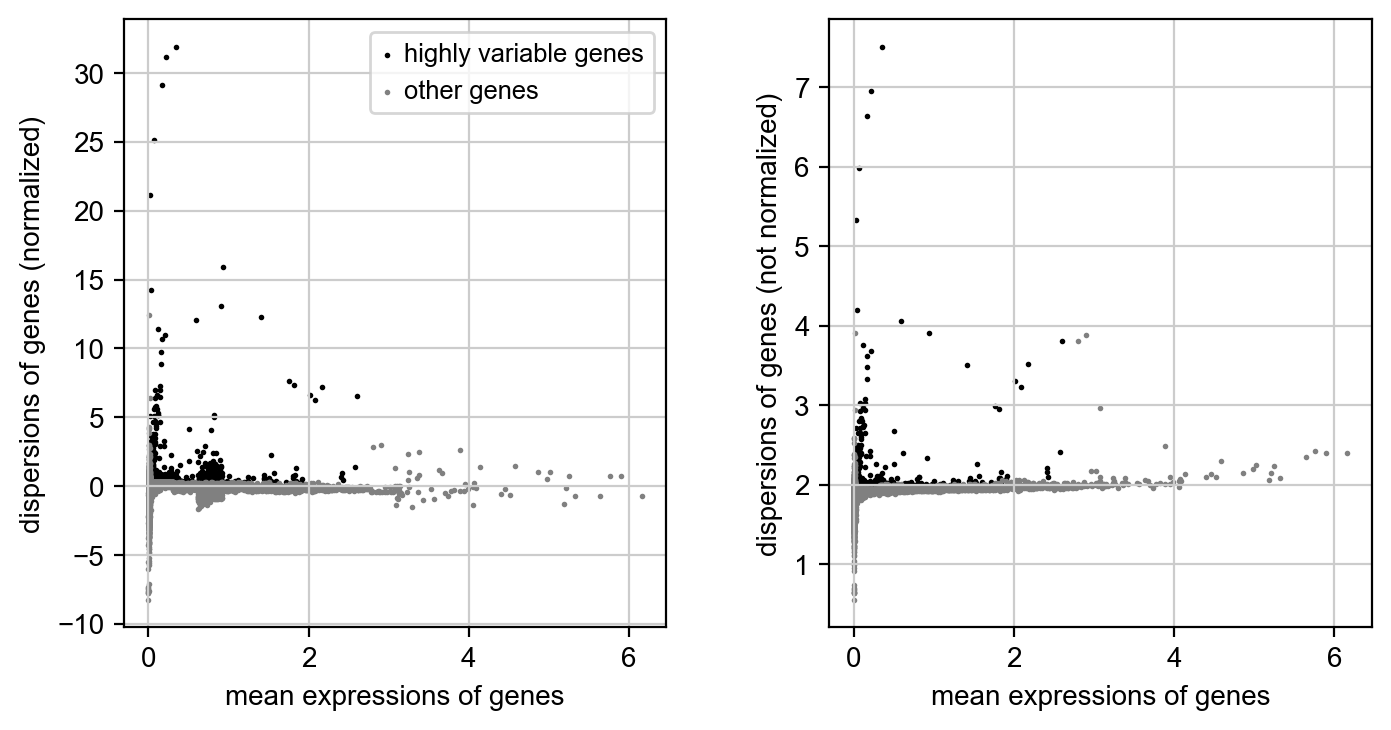

In [46]:
sc.pl.highly_variable_genes(adata)

In [47]:
#for inGene in adata.var[-8:].index.tolist():
#    adata.var.loc[inGene,"highly_variable"] = False

In [48]:
adata.raw = adata

In [49]:
#adata = adata[:, adata.var.highly_variable]
adata = adata[:, np.logical_and(adata.var.highly_variable, np.logical_not(adata.var.mt))]

In [50]:
#sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [51]:
#sc.pp.scale(adata, max_value=10)

In [52]:
sc.tl.pca(adata, n_comps = 100, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=100


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


    finished (0:00:04)


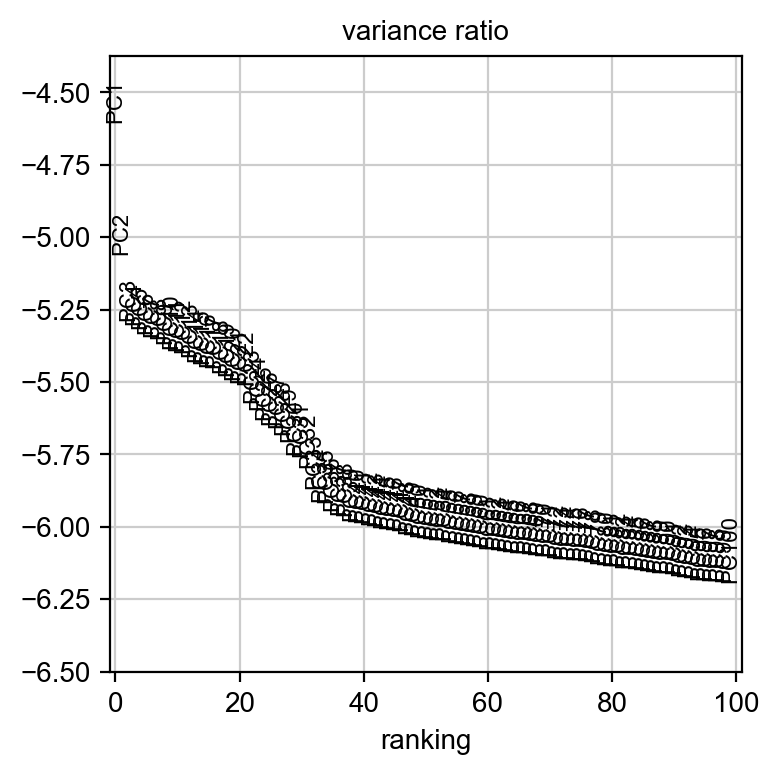

In [53]:
sc.pl.pca_variance_ratio(adata, n_pcs = 100, log=True)

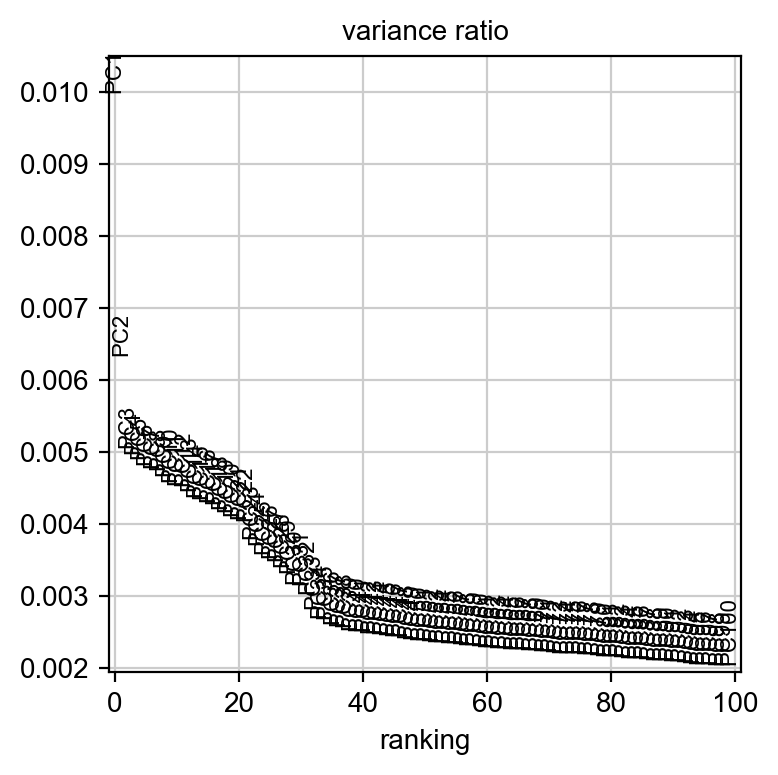

In [54]:
sc.pl.pca_variance_ratio(adata, n_pcs = 100)

In [55]:
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:35)


In [56]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:37)


In [57]:
sc.tl.leiden(adata, resolution=0.25)

running Leiden clustering
    finished: found 3 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:07)


In [58]:
adata.obs

label  n_genes  n_genes_by_counts  total_counts  \
AAACCTGAGAAACCGC-1_0      0     1126               1125        3143.0   
AAACCTGAGAATGTGT-1_0      0      625                624        1419.0   
AAACCTGAGACGCACA-1_0      0      608                607        1367.0   
AAACCTGAGAGAGCTC-1_0      0      767                765        1754.0   
AAACCTGAGAGGACGG-1_0      0      709                707        1553.0   
...                     ...      ...                ...           ...   
TTTGCGCGTAAGGATT-1_48    48     2129               2125        8077.0   
TTTGGTTCAGATCGGA-1_48    48     1529               1527        4970.0   
TTTGGTTCAGGCAGTA-1_48    48     2588               2560        6115.0   
TTTGTCACACGGTGTC-1_48    48     1469               1468        4613.0   
TTTGTCAGTGCCTGCA-1_48    48     2236               2234        6683.0   

                       pct_counts_in_top_50_genes  \
AAACCTGAGAAACCGC-1_0                    44.416163   
AAACCTGAGAATGTGT-1_0                    45.947851   
AAACCTGAGACGCACA-1_0                    46.013168   
AAACCTGAGAGAGCTC-1_0                    46.408210   
AAACCTGAGAGGACGG-1_0                    44.752093   
...                                           ...   
TTTGCGCGTAAGGATT-1_48                   32.301597   
TTTGGTTCAGATCGGA-1_48                   33.983903   
TTTGGTTCAGGCAGTA-1_48                   21.079313   
TTTGTCACACGGTGTC-1_48                   37.004119   
TTTGTCAGTGCCTGCA-1_48                   29.792010   

                       pct_counts_in_top_100_genes  \
AAACCTGAGAAACCGC-1_0                     53.452116   
AAACCTGAGAATGTGT-1_0                     56.448203   
AAACCTGAGACGCACA-1_0                     56.474031   
AAACCTGAGAGAGCTC-1_0                     55.530217   
AAACCTGAGAGGACGG-1_0                     54.539601   
...                                            ...   
TTTGCGCGTAAGGATT-1_48                    43.320540   
TTTGGTTCAGATCGGA-1_48                    44.969819   
TTTGGTTCAGGCAGTA-1_48                    30.891251   
TTTGTCACACGGTGTC-1_48                    47.344461   
TTTGTCAGTGCCTGCA-1_48                    40.101751   

                       pct_counts_in_top_200_genes  \
AAACCTGAGAAACCGC-1_0                     64.301623   
AAACCTGAGAATGTGT-1_0                     70.119803   
AAACCTGAGACGCACA-1_0                     70.226774   
AAACCTGAGAGAGCTC-1_0                     66.932725   
AAACCTGAGAGGACGG-1_0                     67.353509   
...                                            ...   
TTTGCGCGTAAGGATT-1_48                    56.320416   
TTTGGTTCAGATCGGA-1_48                    58.732394   
TTTGGTTCAGGCAGTA-1_48                    42.060507   
TTTGTCACACGGTGTC-1_48                    60.112725   
TTTGTCAGTGCCTGCA-1_48                    51.922789   

                       pct_counts_in_top_500_genes  total_counts_mt  \
AAACCTGAGAAACCGC-1_0                     80.114540              9.0   
AAACCTGAGAATGTGT-1_0                     91.261452              9.0   
AAACCTGAGACGCACA-1_0                     92.172641              9.0   
AAACCTGAGAGAGCTC-1_0                     84.891676              7.0   
AAACCTGAGAGGACGG-1_0                     86.670959              6.0   
...                                            ...              ...   
TTTGCGCGTAAGGATT-1_48                    73.542157             45.0   
TTTGGTTCAGATCGGA-1_48                    76.941650             31.0   
TTTGGTTCAGGCAGTA-1_48                    59.247751            373.0   
TTTGTCACACGGTGTC-1_48                    77.346629             52.0   
TTTGTCAGTGCCTGCA-1_48                    68.726620            224.0   

                       pct_counts_mt leiden  
AAACCTGAGAAACCGC-1_0        0.286351      0  
AAACCTGAGAATGTGT-1_0        0.634250      0  
AAACCTGAGACGCACA-1_0        0.658376      0  
AAACCTGAGAGAGCTC-1_0        0.399088      0  
AAACCTGAGAGGACGG-1_0        0.386349      0  
...                              ...    ...  
TTTGCGCGTAAGGATT-1_48       0.55713

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_

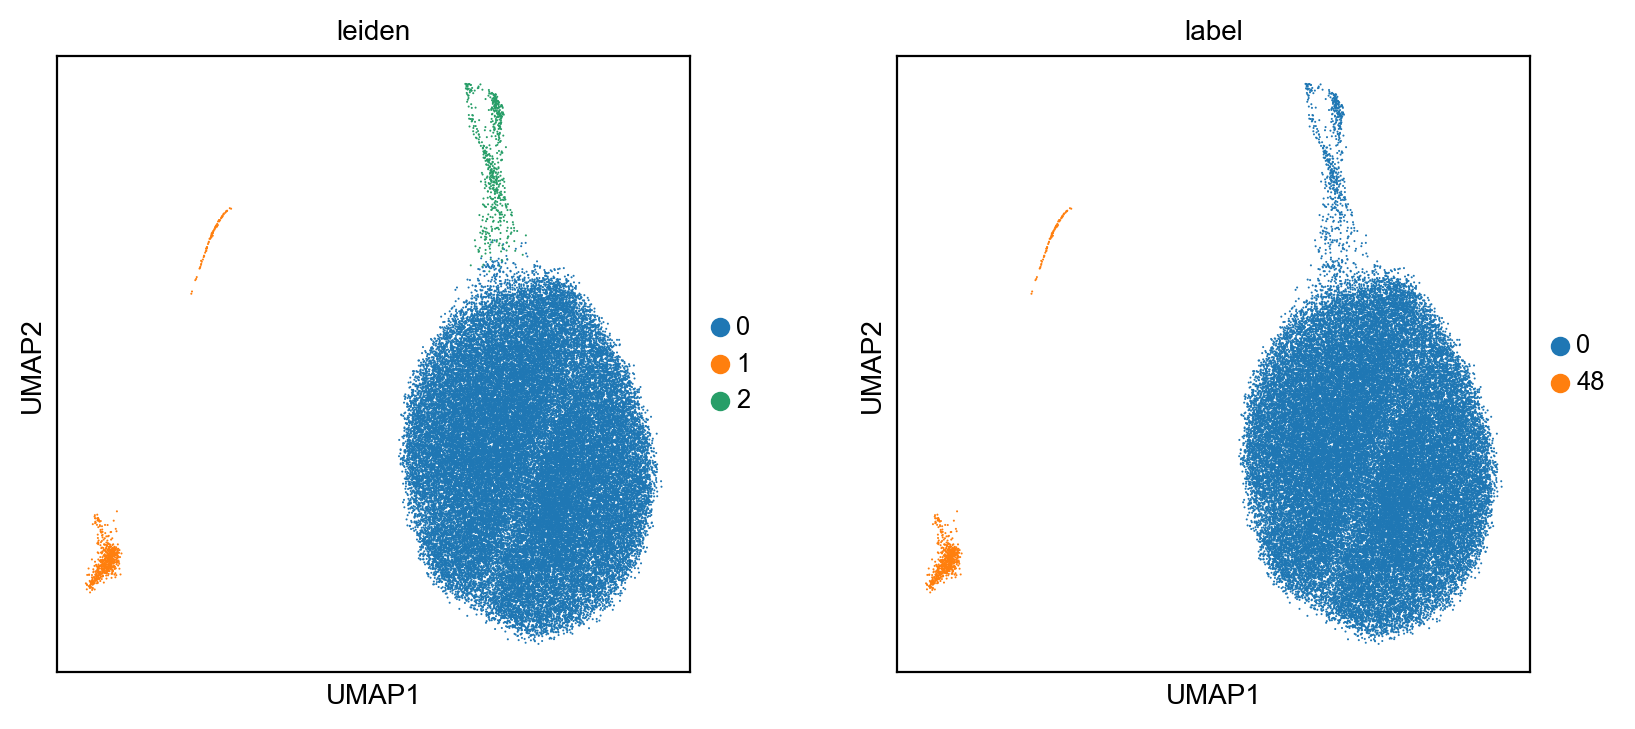

In [60]:
sc.pl.umap(adata, color=["leiden","label"],ncols=2)

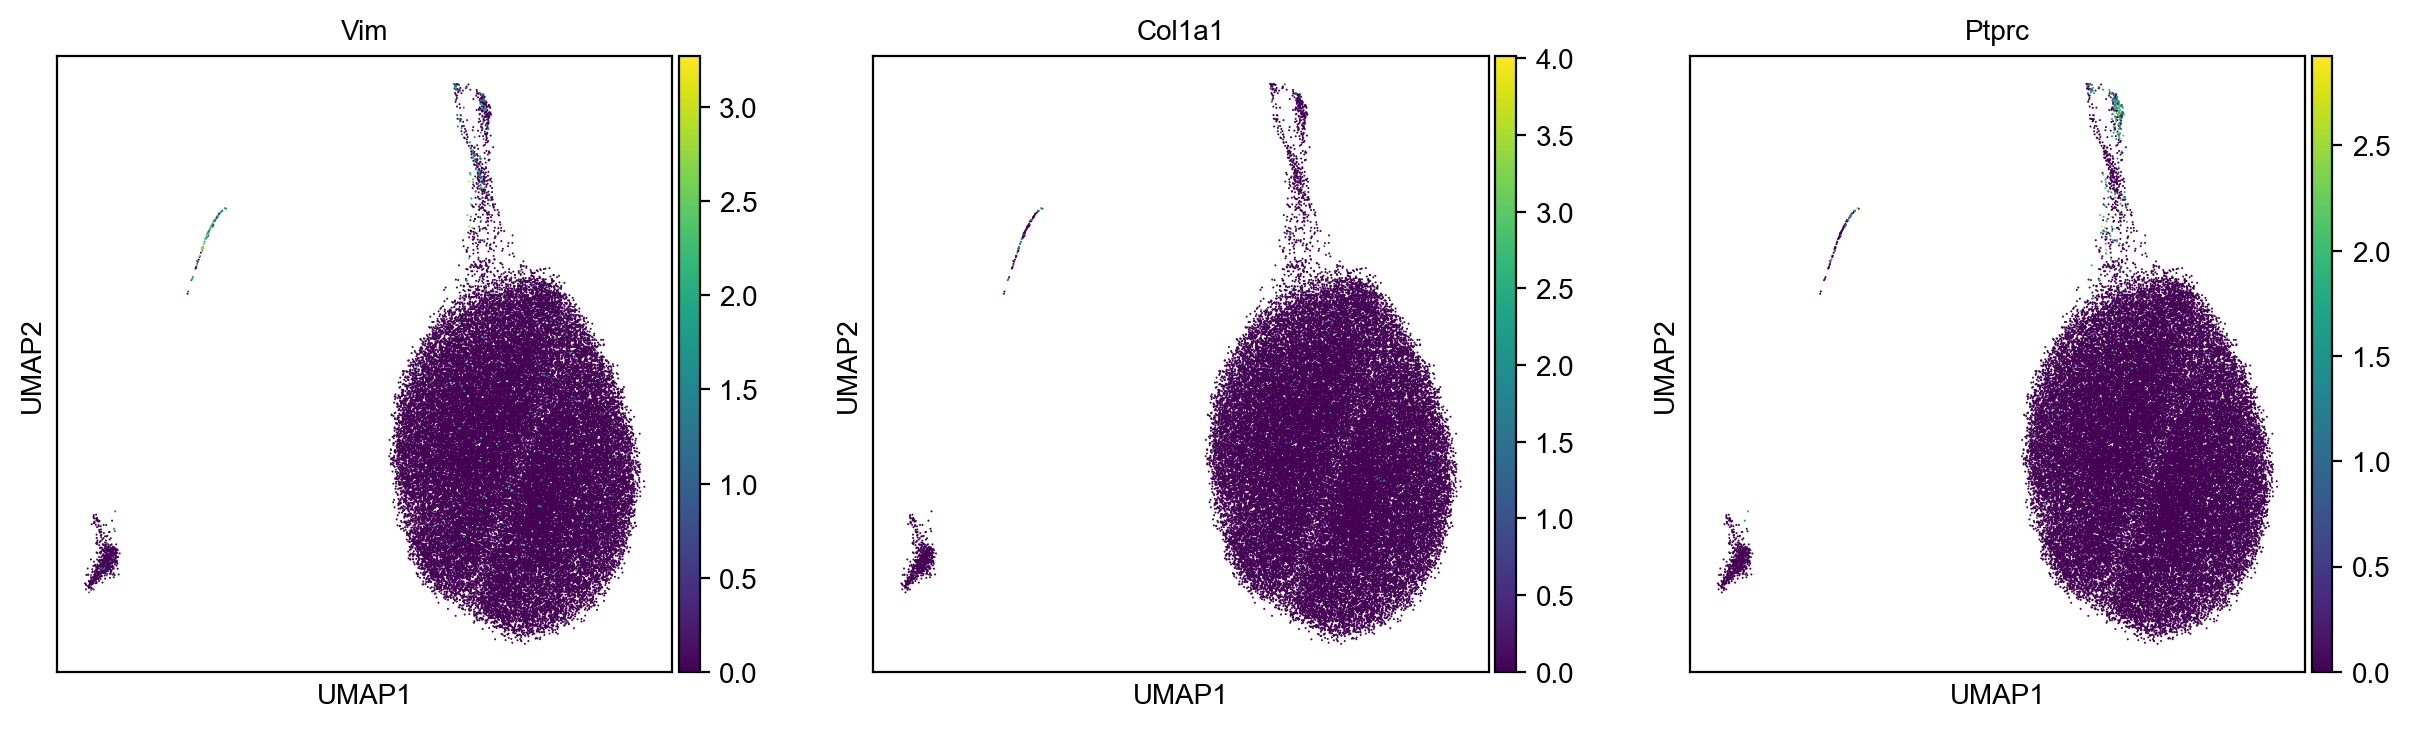

In [61]:
sc.pl.umap(adata, color=["Vim","Col1a1","Ptprc"],ncols=3)

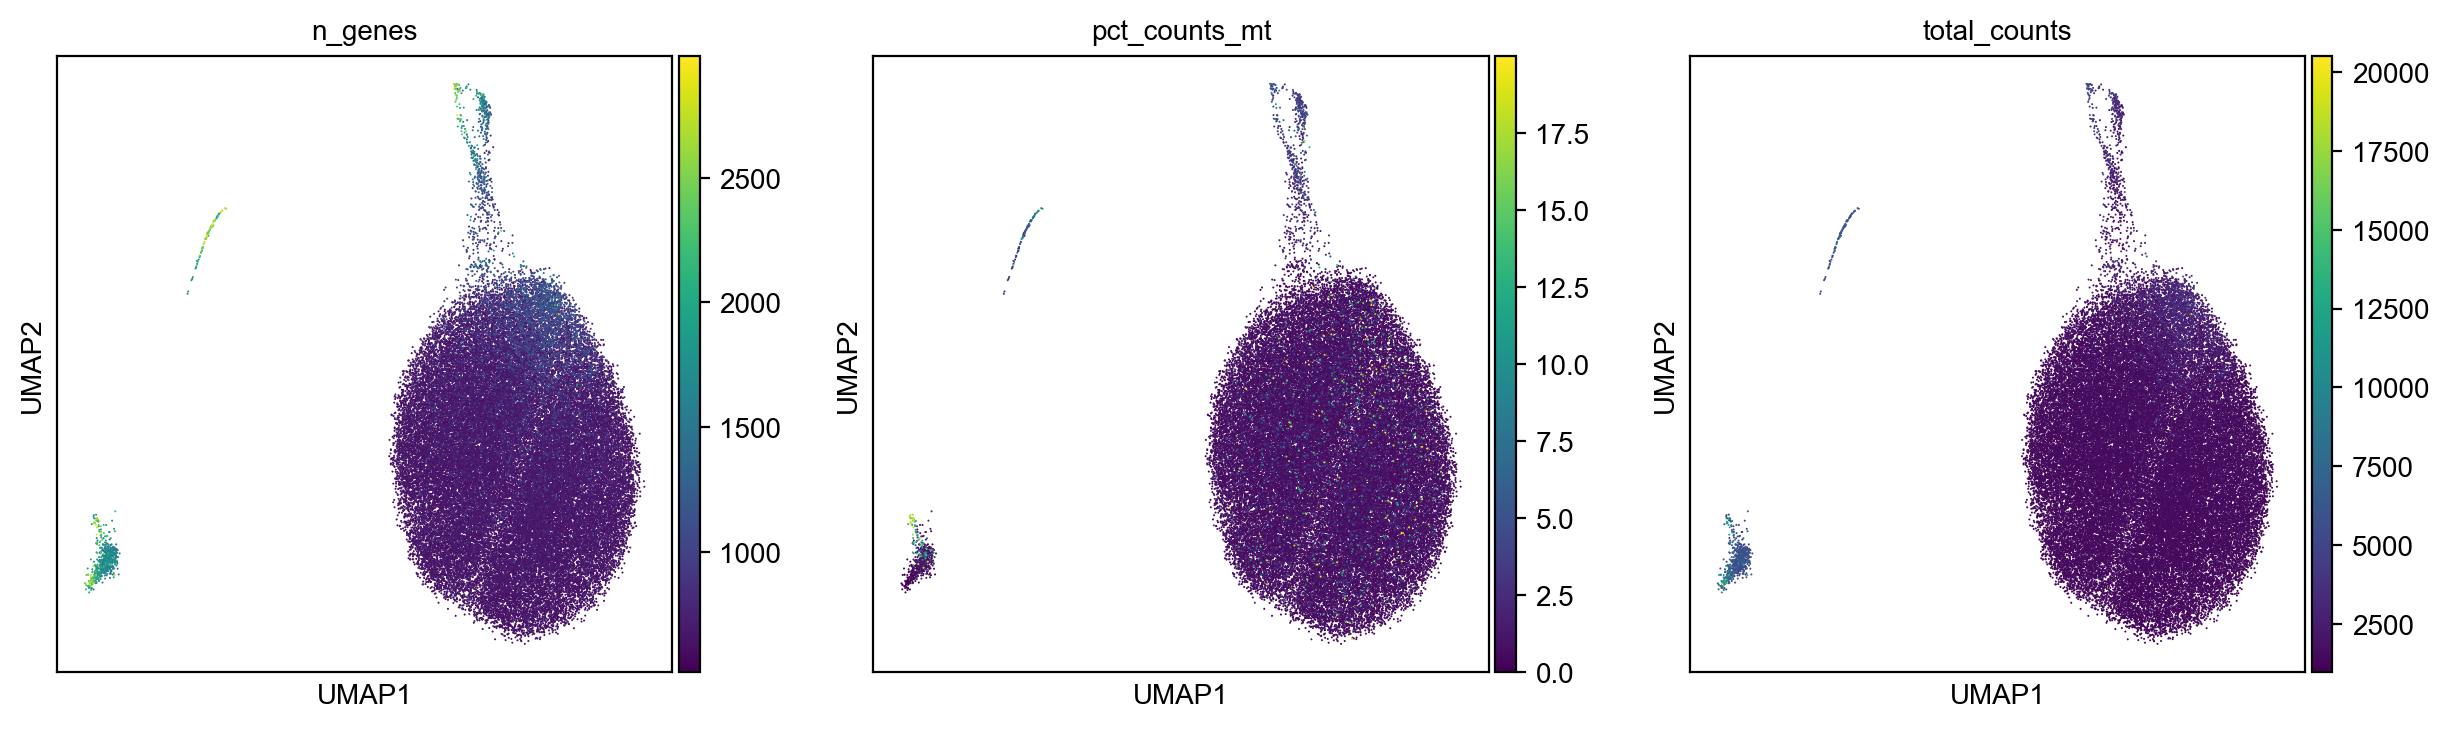

In [62]:
sc.pl.umap(adata, color=["n_genes","pct_counts_mt","total_counts"])

ranking genes


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:05)


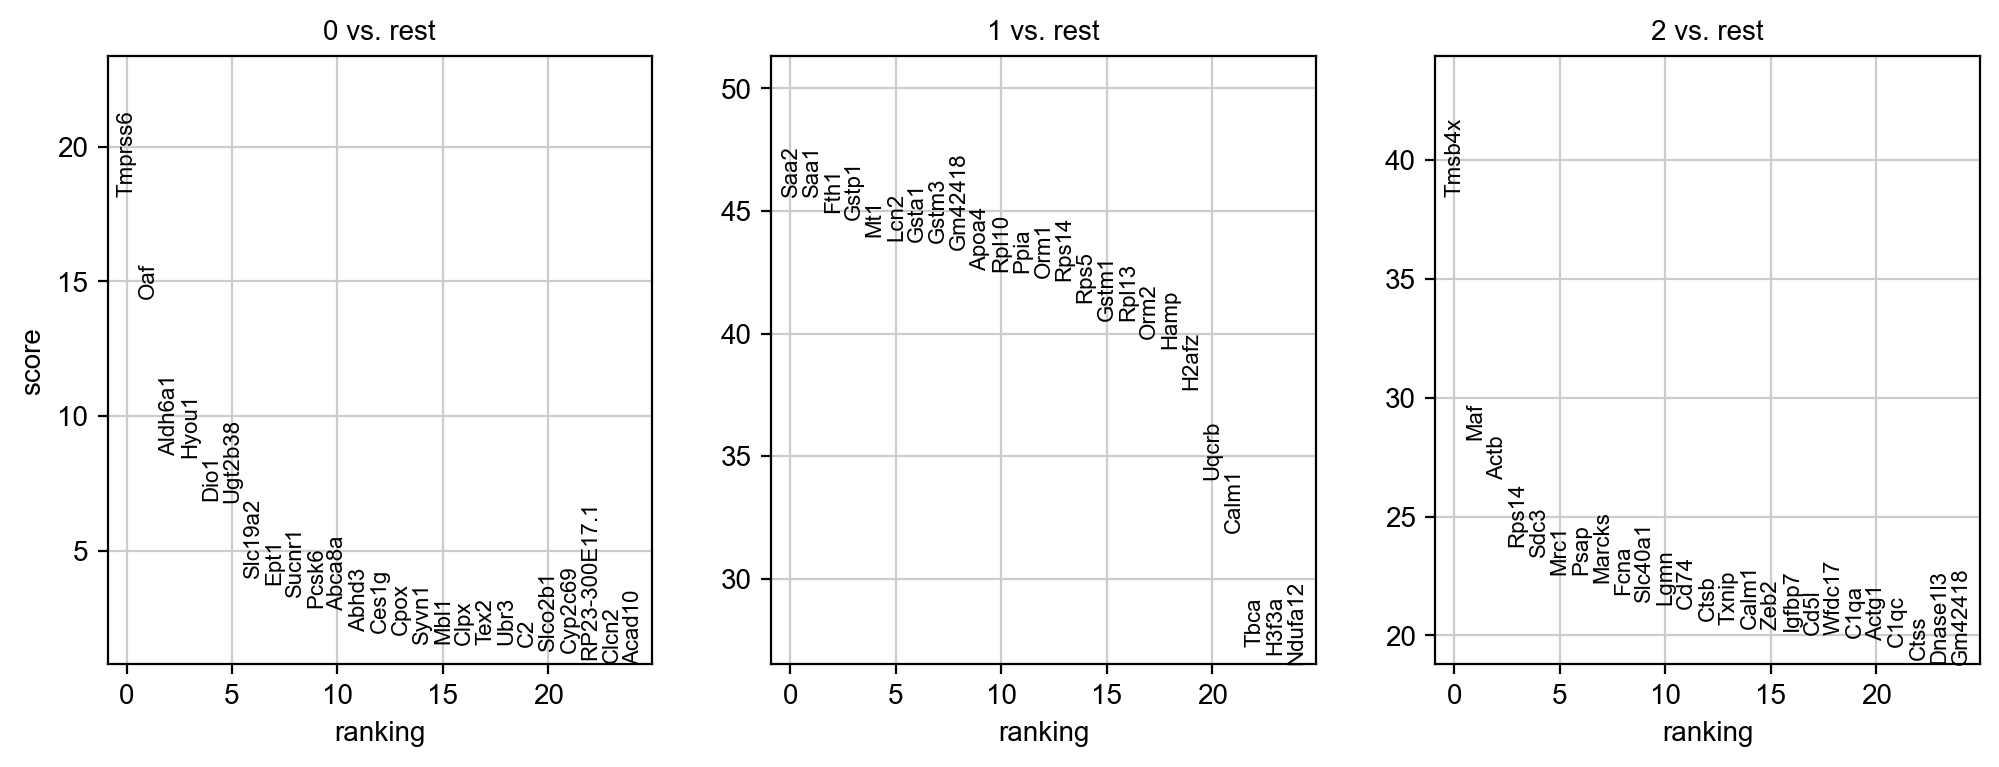

In [63]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon', use_raw=False)
#sc.tl.filter_rank_genes_groups(adata, groupby="leiden", use_raw=False,
#                                   key_added='rank_genes_groups_filtered', 
#                                   min_in_group_fraction=0.25, min_fold_change=1, max_out_group_fraction=0.5, compare_abs=False)
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [64]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(15)

0        1        2
0   Tmprss6     Saa2   Tmsb4x
1       Oaf     Saa1      Maf
2   Aldh6a1     Fth1     Actb
3     Hyou1    Gstp1    Rps14
4      Dio1      Mt1     Sdc3
5   Ugt2b38     Lcn2     Mrc1
6   Slc19a2    Gsta1     Psap
7      Ept1    Gstm3   Marcks
8    Sucnr1  Gm42418     Fcna
9     Pcsk6    Apoa4  Slc40a1
10   Abca8a    Rpl10     Lgmn
11    Abhd3     Ppia     Cd74
12    Ces1g     Orm1     Ctsb
13     Cpox    Rps14    Txnip
14    Syvn1     Rps5    Calm1

    using 'X_pca' with n_pcs = 40
Storing dendrogram info using `.uns['dendrogram_leiden']`


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/tools/_dendrogram.py:133: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/get/get.py:66: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/get/get.py:66: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What

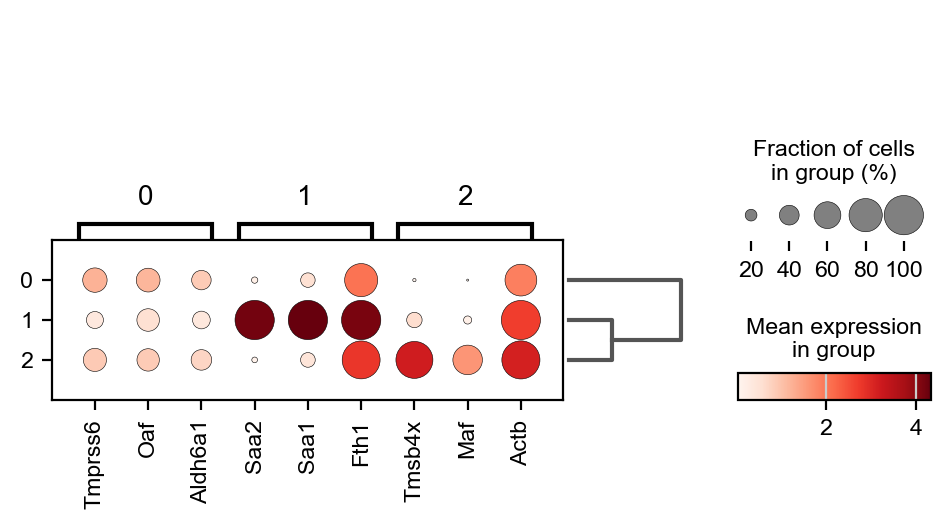

In [65]:
sc.tl.dendrogram(adata,groupby="leiden", n_pcs=40)
sc.pl.rank_genes_groups_dotplot(adata,n_genes=3)#,key="rank_genes_groups_filtered")

In [80]:
sigFile = "data/geneSigs/rengenGeneLists/PancreasPlasticBurdziak.csv"
sigGenes = pd.read_csv(sigFile, skiprows=1)
plas = sigGenes["gene"].values
sc.tl.score_genes(adata, plas, score_name="plas_score")

computing score 'plas_score'
    finished: added
    'plas_score', score of gene set (adata.obs).
    1185 total control genes are used. (0:00:00)


In [66]:
sigFile = "../mhCompTiss/data/LUAD/simpLUADbig.csv"
sigGenes = pd.read_csv(sigFile)
hpcs = sigGenes["HPCS"].dropna()
hpcs

In [67]:
sc.tl.score_genes(adata, hpcs, score_name="HPCS_score")

computing score 'HPCS_score'
    finished: added
    'HPCS_score', score of gene set (adata.obs).
    1181 total control genes are used. (0:00:00)


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_

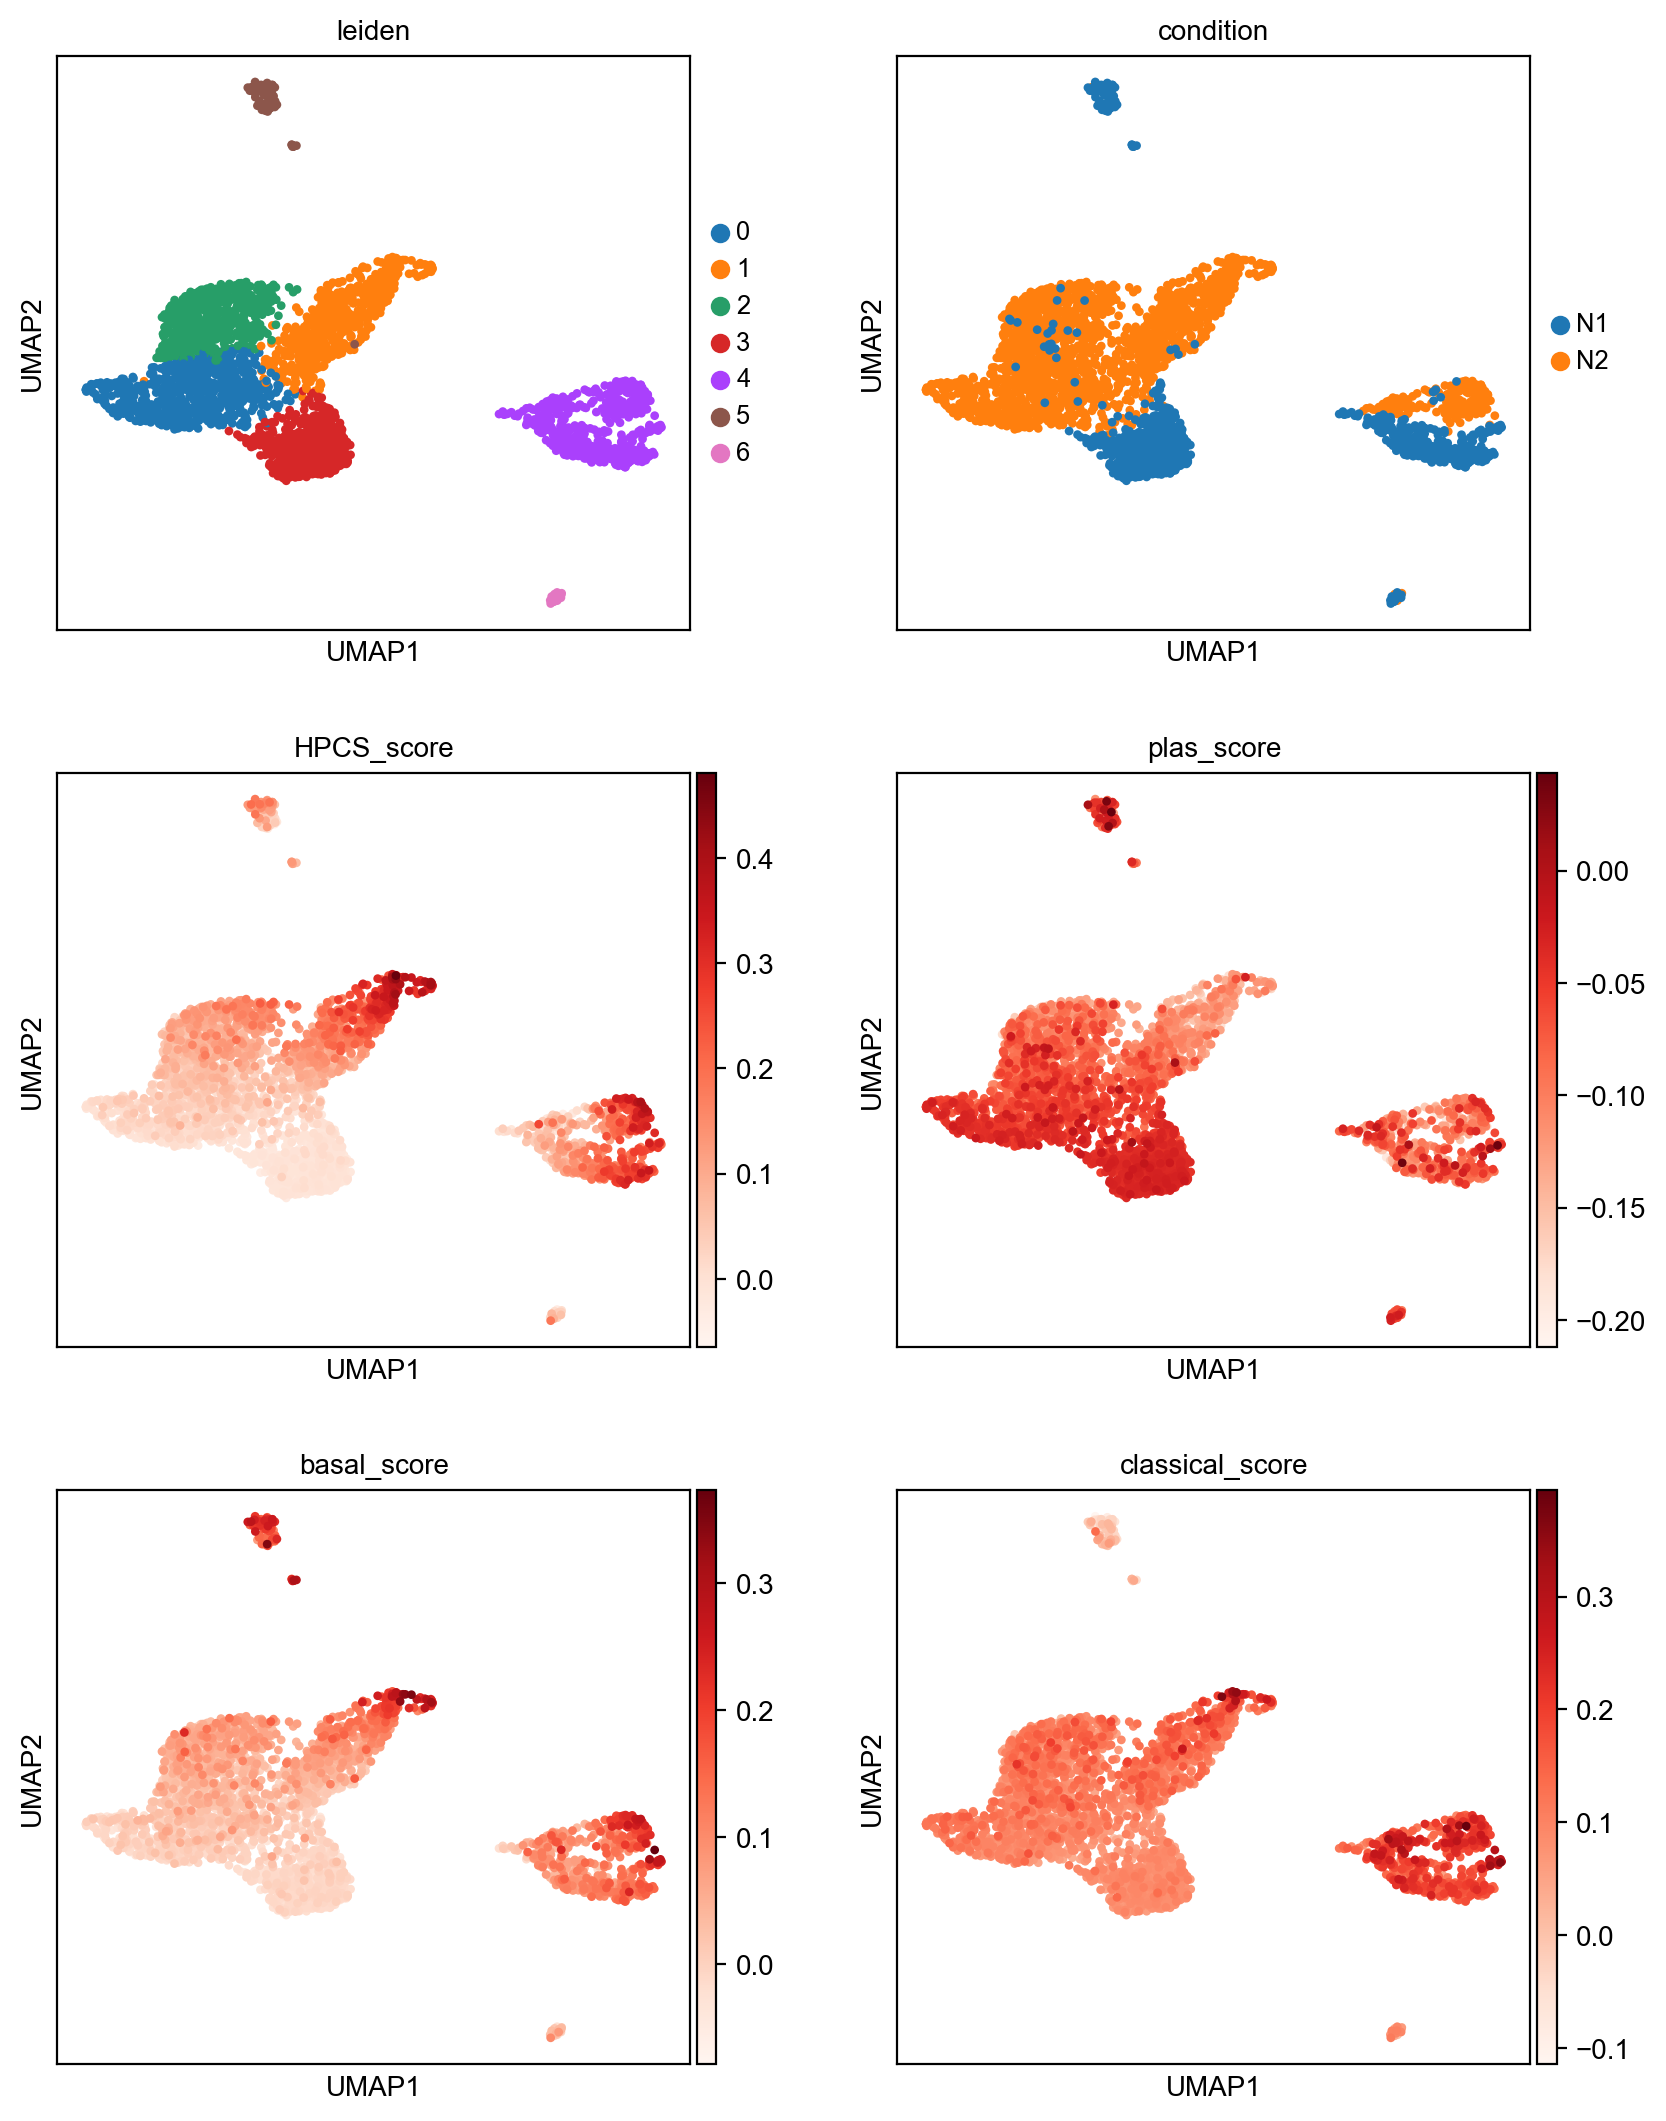

In [86]:
sc.pl.umap(adata, color=["leiden","condition","HPCS_score","plas_score","basal_score","classical_score"],ncols=2, cmap="Reds")

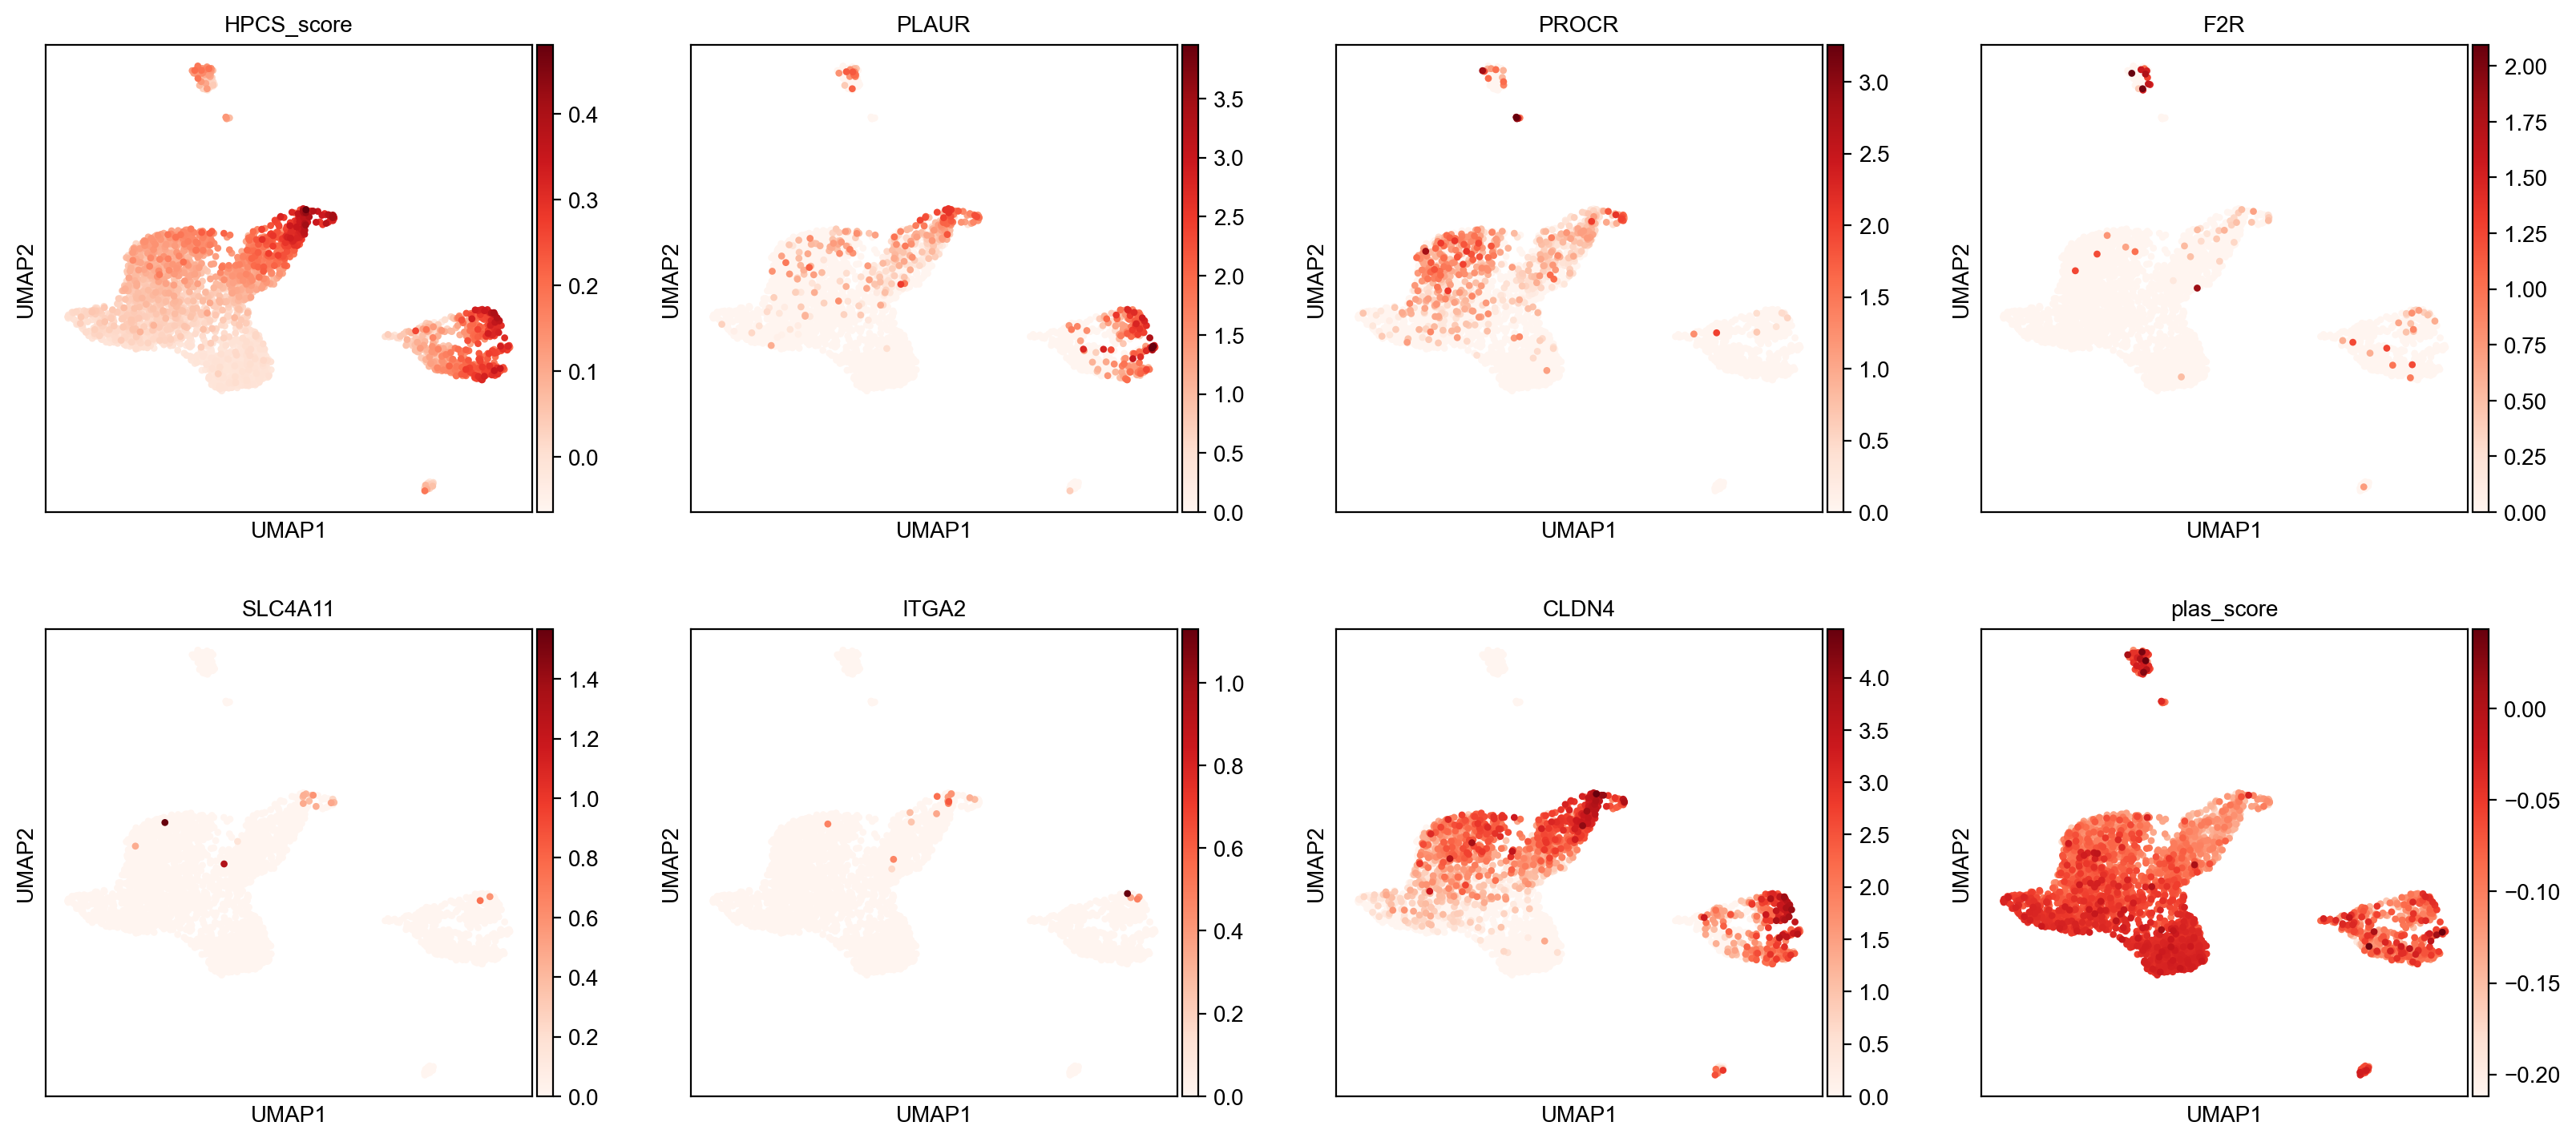

In [82]:
sc.pl.umap(adata, color=["HPCS_score","Plaur", "Procr", "F2r", 
                         "Slc4a11", "Itga2", "Cldn4"],ncols=4, cmap="Reds")

In [90]:
resultsFile

'write/GSE207938_ProgressionCohort_Norm.h5ad'

In [91]:
adata.write(resultsFile)
adata

AnnData object with n_obs × n_vars = 3037 × 2123
    obs: 'batch', 'condition', 'cluster', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'HPCS_score', 'plas_score', 'classical_score', 'basal_score'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'condition_colors', 'rank_genes_groups', 'dendrogram_leiden'
    obsm: 'X_EMBED', 'X_PCA', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_

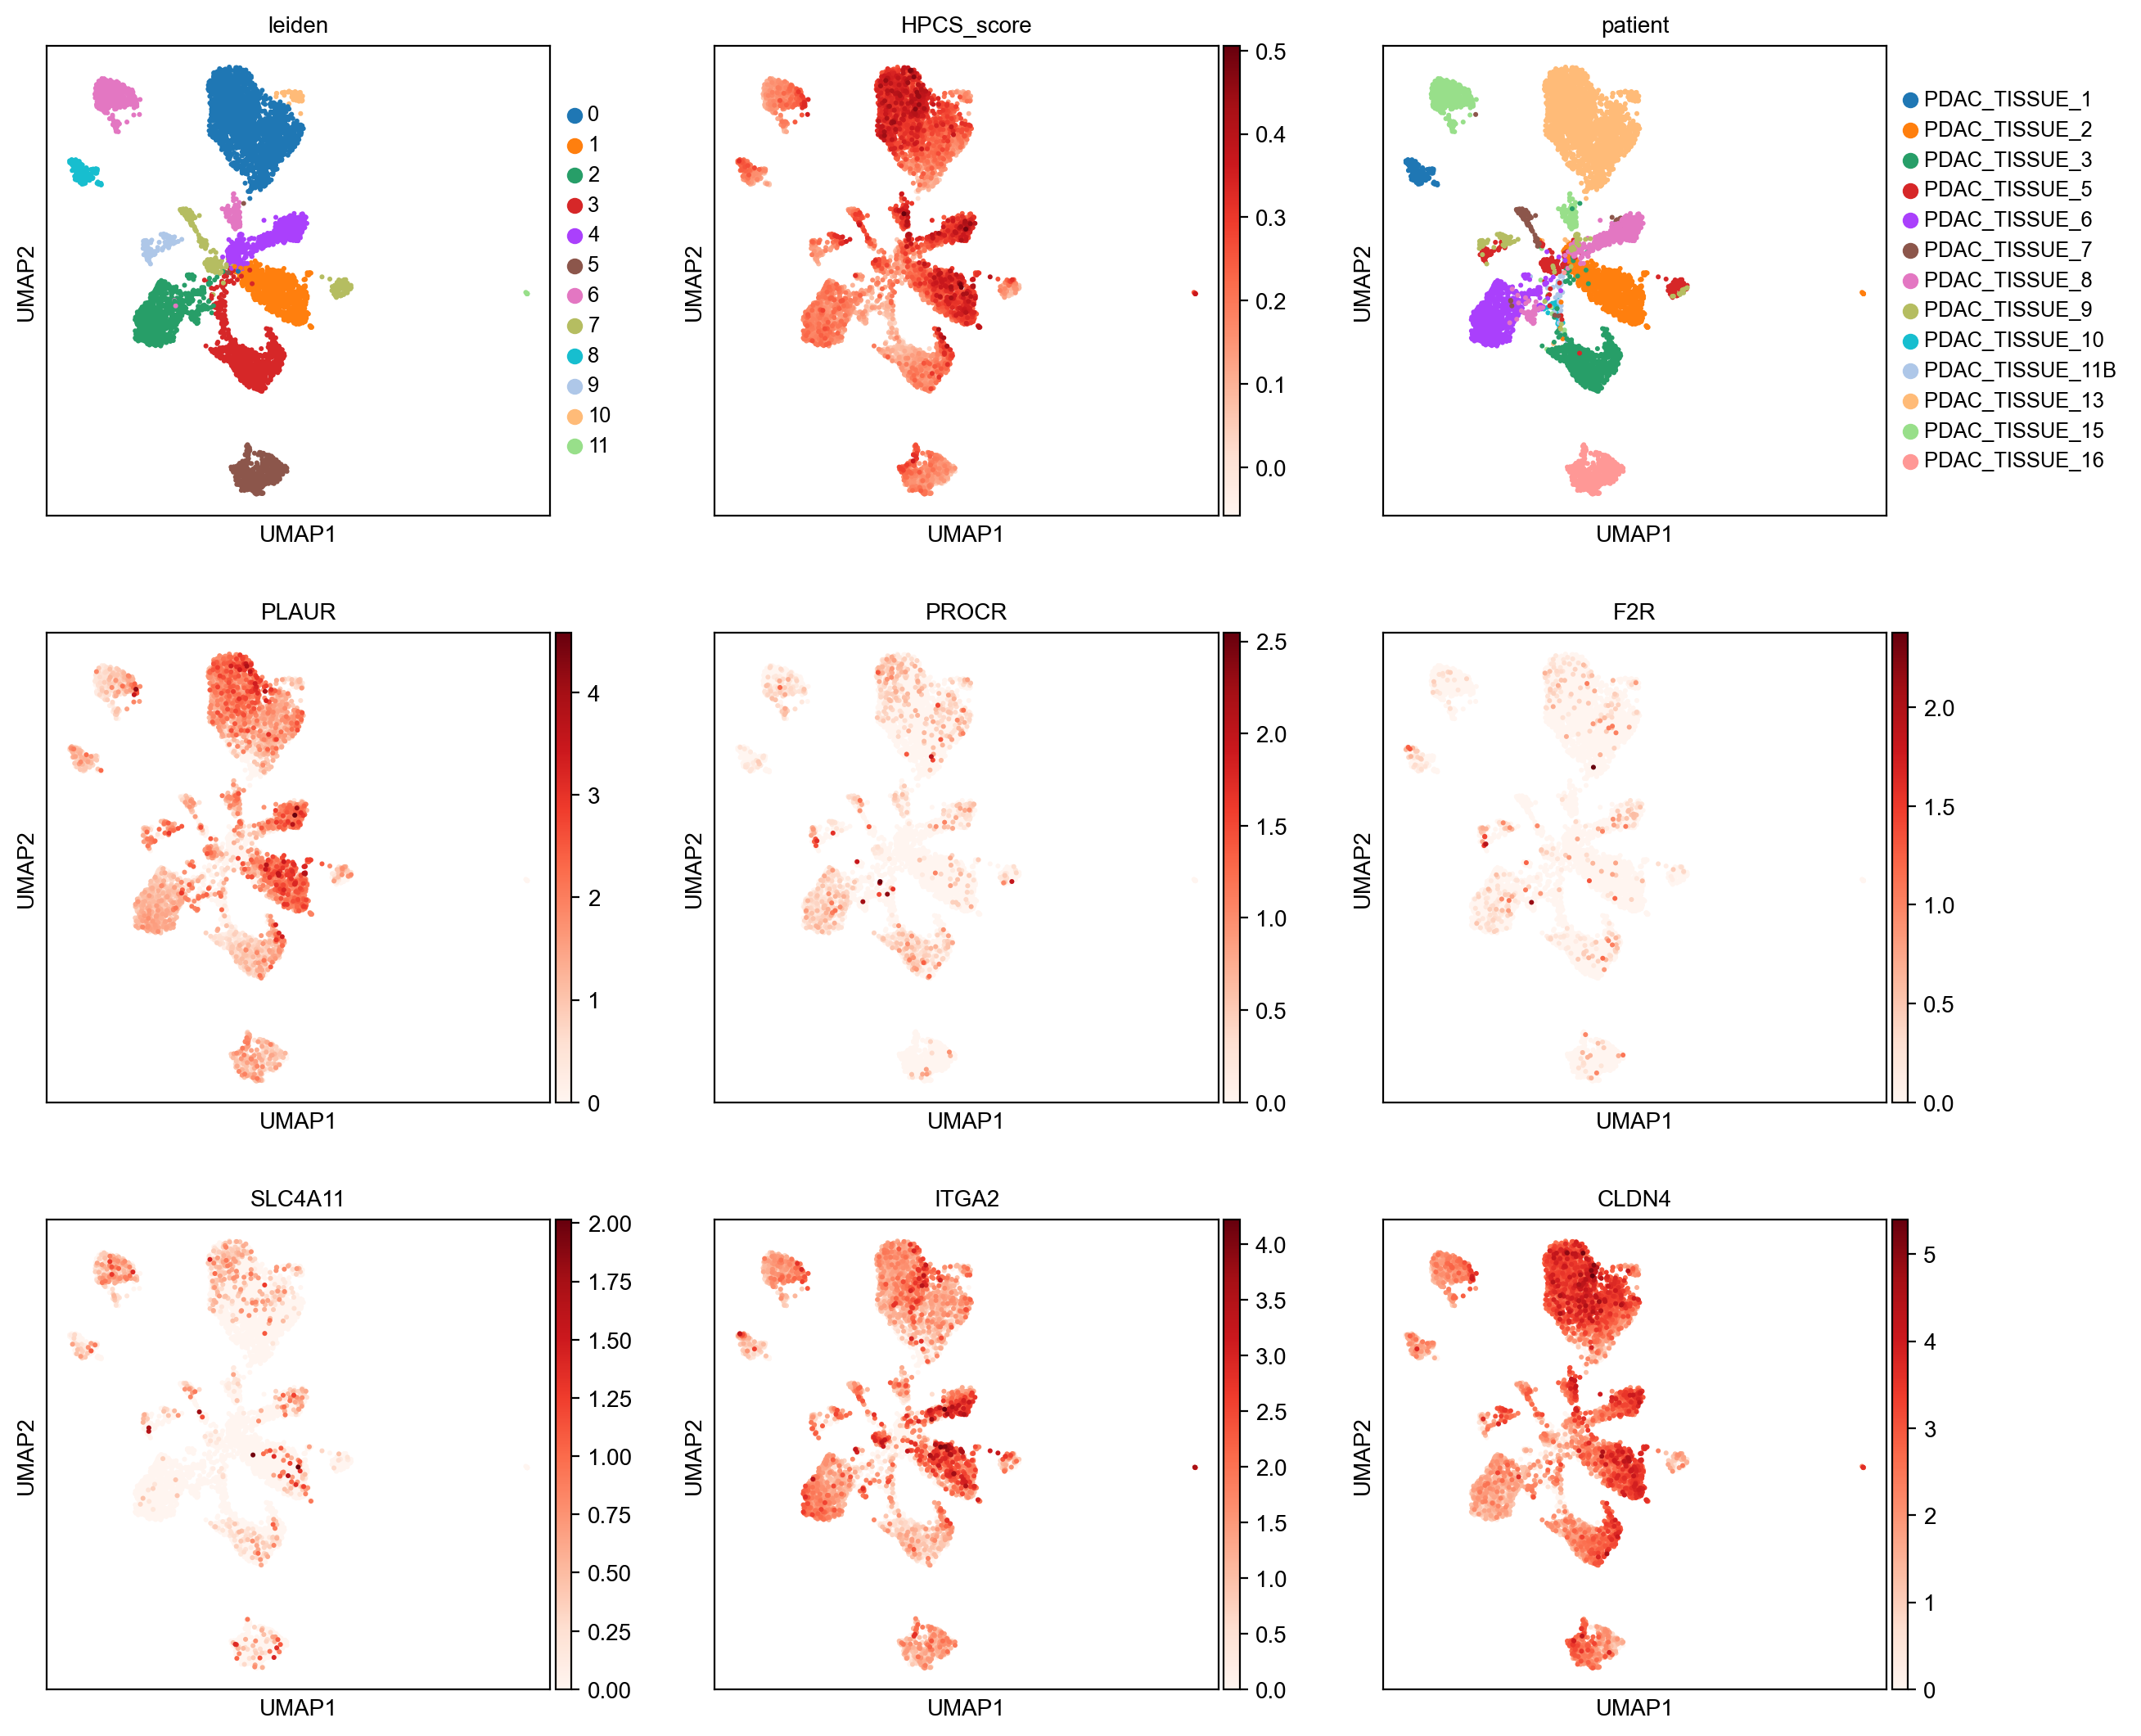

In [1]:
import scanpy as sc
writeDir = "write/"
fileName = "GSE207938_ProgressionCohort_Norm"
resultsFile = writeDir + fileName + '.h5ad' 
adata = sc.read_h5ad(resultsFile)
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=150, fontsize=10, format='png')
sc.pl.umap(adata, color=["leiden","HPCS_score","condition","PLAUR", "PROCR", "F2R", "SLC4A11", "ITGA2", "CLDN4"],ncols=3, cmap="Reds")


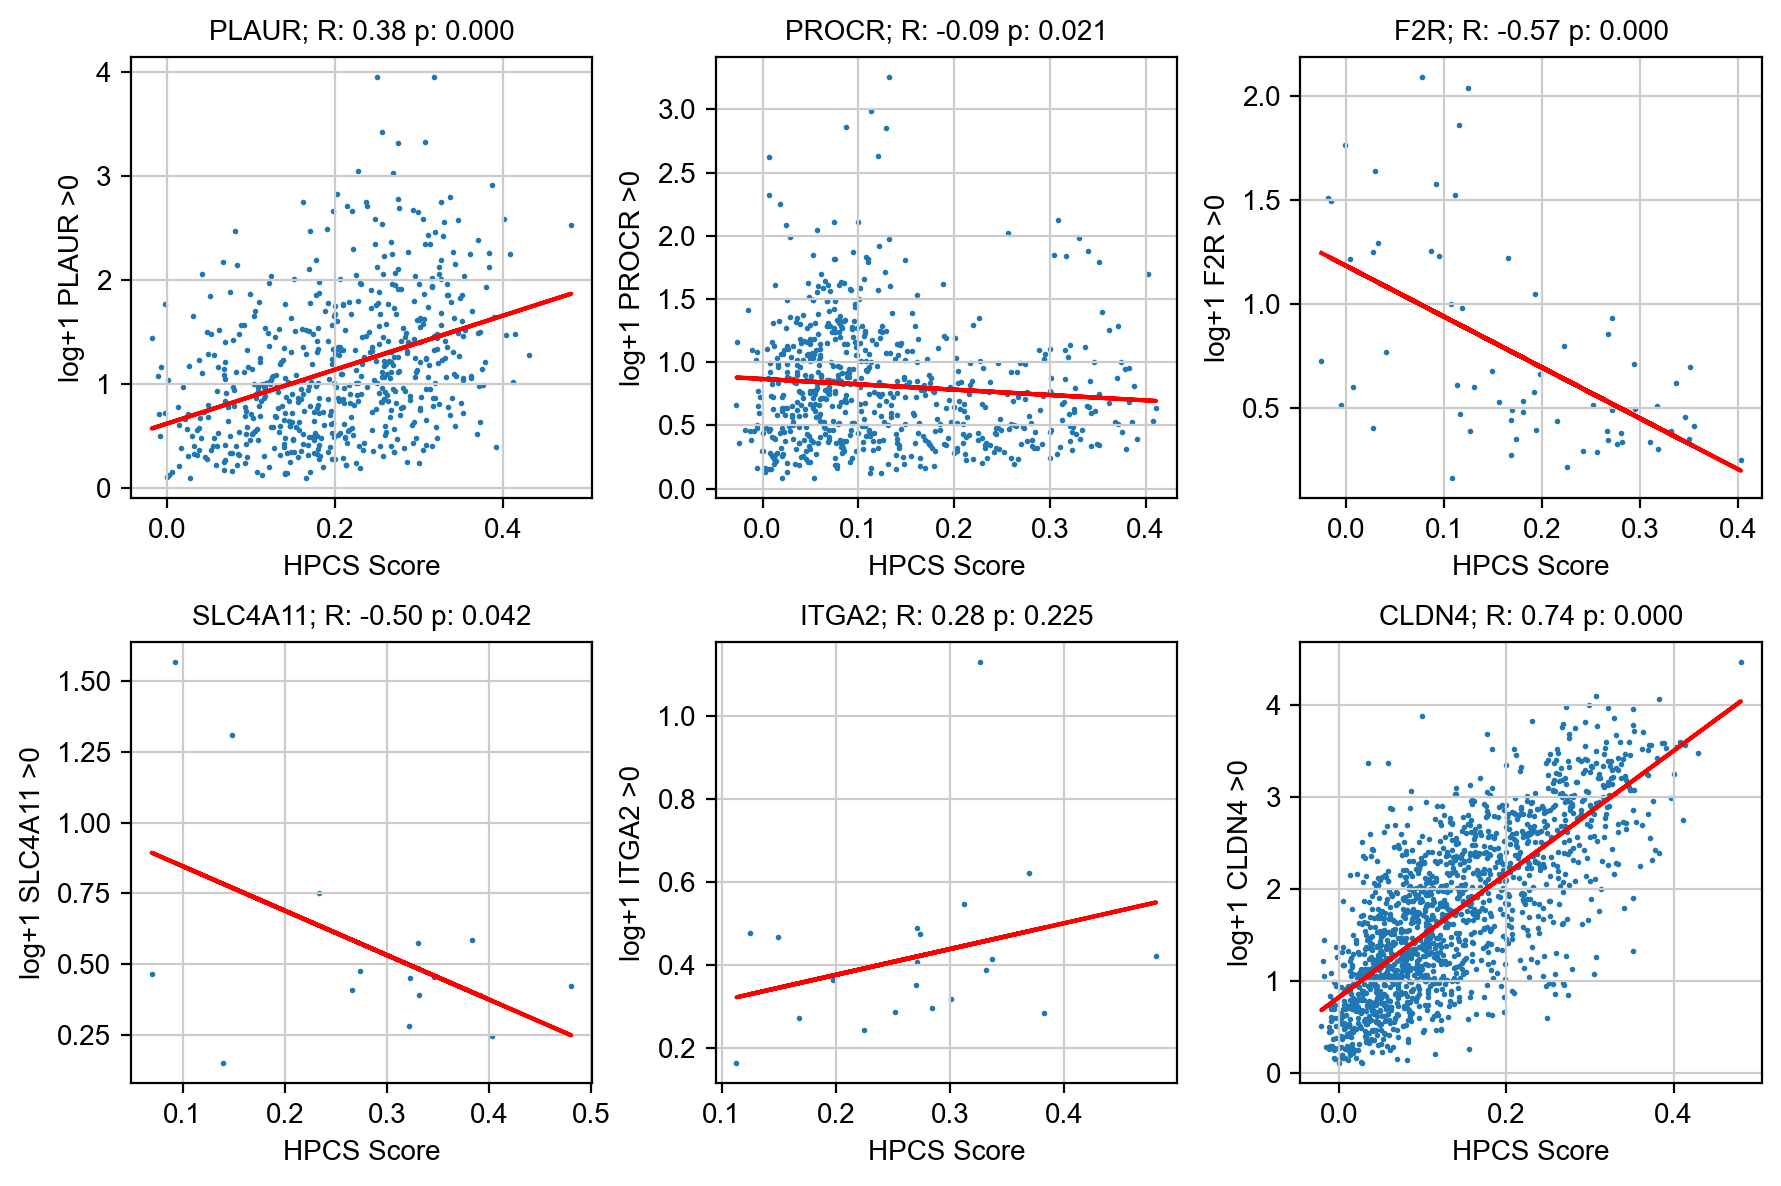

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import linregress

adatar = adata.raw.to_adata()

def plotExpvScore(gene, ax):
    geneExpr = np.array(adatar[:,adatar.var_names==gene].X.todense().flatten())[0]
    
    x = adata.obs.HPCS_score.values[geneExpr>0]
    y = geneExpr[geneExpr>0]
    
    # Fit linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    #print(slope, intercept, r_value, p_value, std_err)
    
    # Calculate confidence interval
    confidence_interval = 1.96 * std_err  # 95% confidence interval
    
    # Create scatter plot
    ax.scatter(x, y, label="Data points", s=1)
    
    # Plot regression line
    ax.plot(x, slope * x + intercept, color='red', label="Regression line")
    
    ## Plot confidence interval
    #ax.fill_between(x, slope * x + intercept - confidence_interval, slope * x + intercept + confidence_interval, color='blue', alpha=0.3, label="Confidence interval")
    
    # Add labels and title
    ax.set_title(f"{gene}; R: {r_value:.2f} p: {p_value:.3f}")
    ax.set_xlabel("HPCS Score")
    ax.set_ylabel(f"log+1 {gene} >0")

    return(r_value)

genes = ["PLAUR", "PROCR", "F2R", "SLC4A11", "ITGA2", "CLDN4"]
rvals = np.zeros(len(genes))
fig, axs = plt.subplots(2,3, figsize=(9,6))

for i,ax in enumerate(axs.flatten()):
    rvals[i] = plotExpvScore(genes[i], ax)

fig.tight_layout()

pd.DataFrame(rvals, index=genes, columns=[fileName]).to_csv(f"{writeDir}/hpcsCorr/{fileName}_GeneRs.csv")